In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import MeanShift
import math

In [2]:
def Euclidian_Distance(Observe,Actual):
        distance=0
        for x in range(len(Observe)):
            distance += pow((Observe[x] - Actual[x]), 2)
        return math.sqrt(distance)

In [3]:
class Mean_Shift:
    # Constructor 
    def __init__(self, radius=3): # Default Radius is 3 (You can tune it accordingly)
        self.radius = radius
        self.centroids = {}
        
    # Create Clusters   
    def fit(self, data):
        centroids = {}
        for x in range(0,1000):
            updated_centroids = []
            for i in data:
                bandwidth = []
                for d in data:
                    if (Euclidian_Distance(i,d) < self.radius):
                        bandwidth.append(d)

                centroid = np.mean(bandwidth,axis=0)
                updated_centroids.append(tuple(centroid))

            new = sorted(list(set(updated_centroids)))
            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(new)):
                centroids[i] = np.array(new[i])
        # Your Code Here
        self.centroids = centroids

In [2]:
# Creating Data Set of clusters
X, _ = make_blobs(n_samples = 200, cluster_std =1.5)

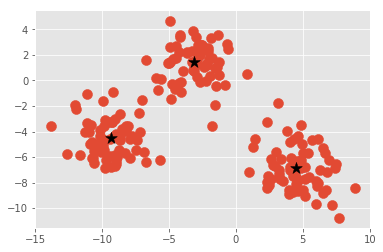

In [10]:
# Creating Object of Class
clf = MeanShift()
clf.fit(X)

# Getting Optimized Centroids

centroids = clf.cluster_centers_

# Simple Scatter plot of 2D Data X
plt.scatter(X[:,0], X[:,1],s=100)

# Plot Cluster centroids as '*'
for c in centroids:
    plt.scatter(c[0], c[1], color='k', marker='*', s=150)

plt.show()